In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 3. Part c)

Text(0, 0.5, 'x')

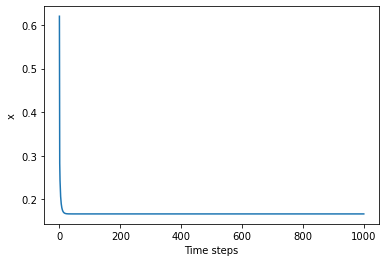

In [55]:
## Defining parameters
a = 1.2; x0 = 0.62; nsteps = 1000;

## Initializing an array of zeros
x = np.zeros(nsteps); x[0] = x0;

## Running simulation
for ii in np.arange(1,nsteps): 
    x[ii] = a * x[ii-1] * (1 - x[ii-1])

# plot results
plt.plot(x); plt.xlabel('Time steps'); plt.ylabel('x')

In [56]:
0.2/1.2

0.16666666666666669

In [57]:
x[200:300]

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666

### Problem 1. Part d)

In [38]:
a = np.arange(3.4, 3.86, 0.05)
n = len(a)
nsteps = 20
x = np.zeros((nsteps, n))
x[0,] = 0.5

for i in range(0, n):
    for ii in np.arange(1, nsteps):
        x[ii, i] = a[i] * x[ii-1,i] * (1-x[ii-1,i])


In [39]:
x[:,9]

array([0.5       , 0.9625    , 0.13896094, 0.46065556, 0.95654026,
       0.16004832, 0.51756649, 0.96131196, 0.14318641, 0.47233364,
       0.9595531 , 0.14942214, 0.48931638, 0.96206056, 0.14052514,
       0.46499464, 0.9577823 , 0.15567614, 0.50604816, 0.96235917])

Text(0, 0.5, 'x')

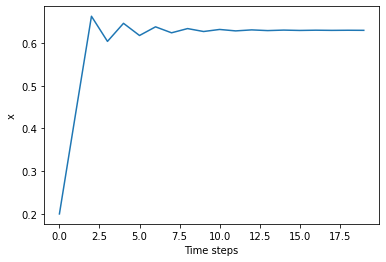

In [50]:
## Defining parameters
a = 2.7; x0 = 0.2; nsteps = 20;

## Initializing an array of zeros
x = np.zeros(nsteps); x[0] = x0;

## Running simulation
for ii in np.arange(1,nsteps): 
    x[ii] = a * x[ii-1] * (1 - x[ii-1])

# plot results
plt.plot(x); plt.xlabel('Time steps'); plt.ylabel('x')